
### EXP1- Language SPM maps

#### *Preprocessing:*
- Niak preprocessed LANGUAGE task (new scrub method)

#### *Connectome SPM-Maps:*

```
   Math 
   Story
  
```

In [1]:
from nilearn import plotting
import os
import numpy as np
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio
import nibabel as nib

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = "/media/yassinebha/database29/Drive/HCP/"
path_rmaps = os.path.join(path_root,"subtypes_scores/26-10-2016/hcp_language_activation_maps_24-Jan-2017/spm_maps/mean_maps_nii/")
rmaps_file_pattern = "{}.nii.gz"

In [4]:
# get networks names
trial_names = [f[:-7] for f in os.listdir(path_rmaps)]
trial_names

['math', 'story']

(53, 64, 52) is the shape of for trial:  math
Min = -36.205; Max = 32.768
(53, 64, 52) is the shape of for trial:  story
Min = -34.024; Max = 36.183


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


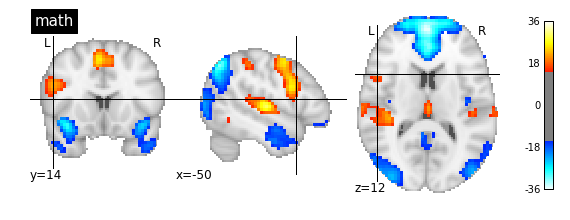

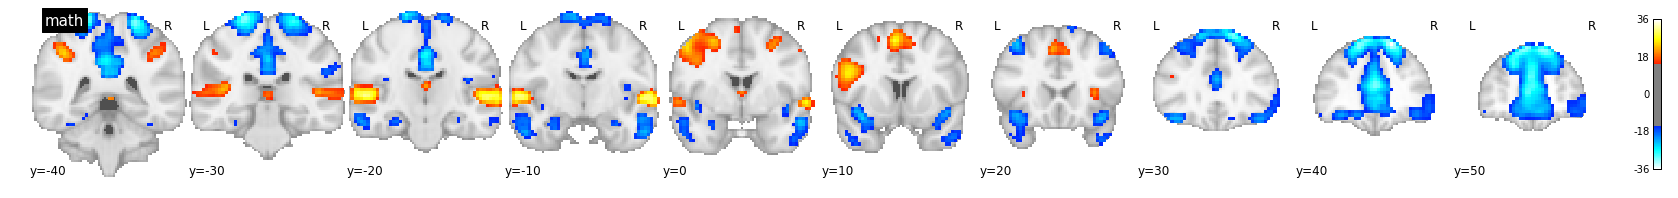

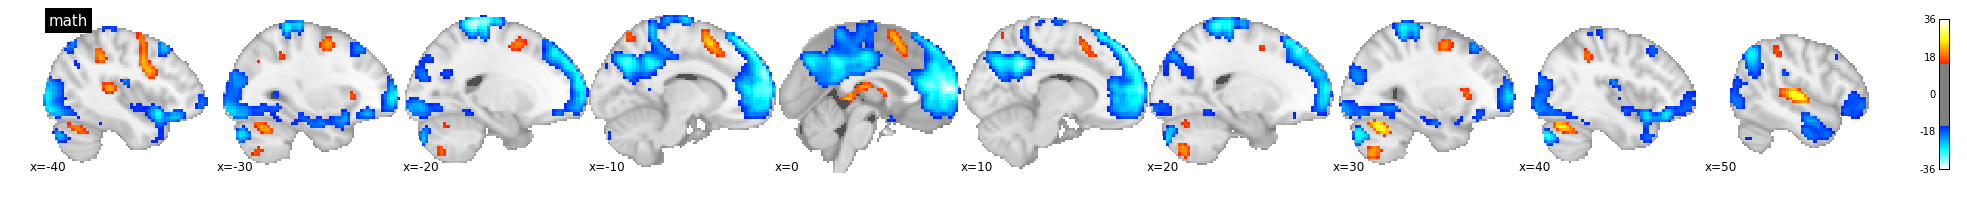

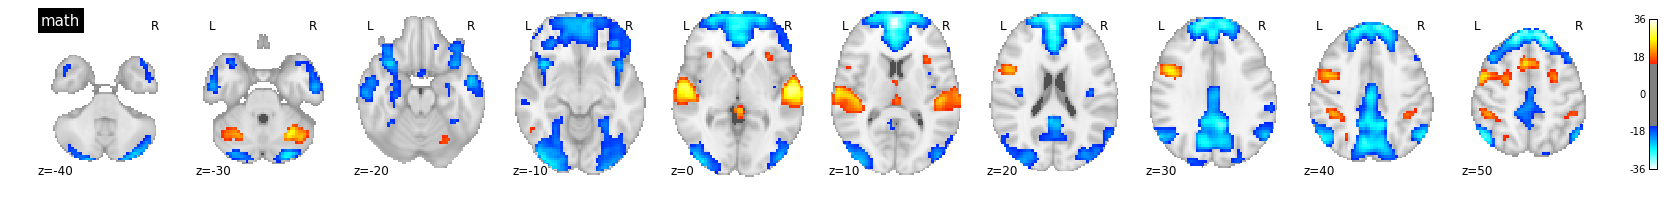

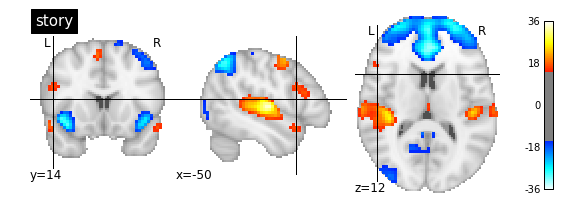

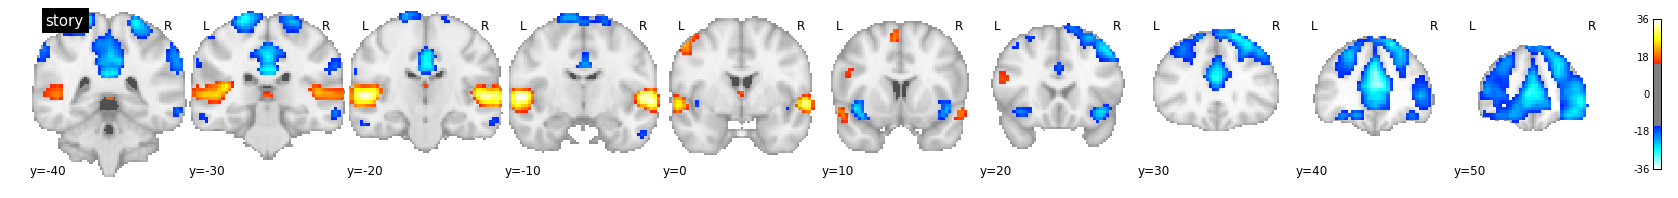

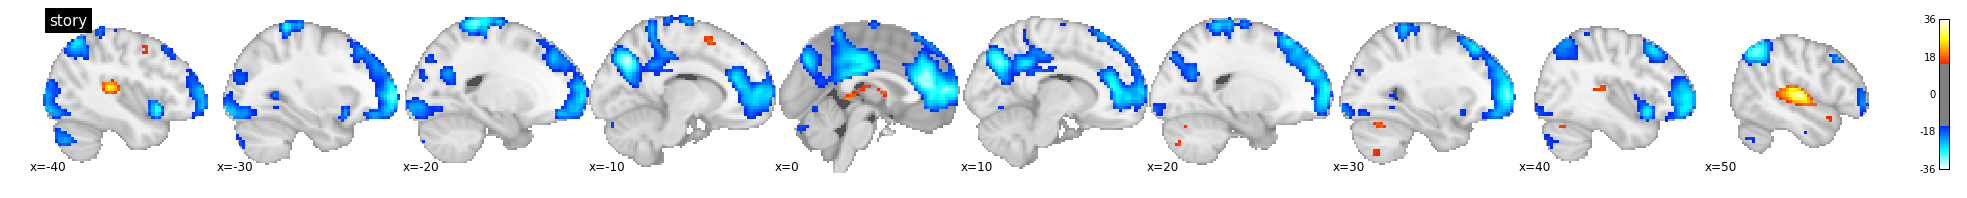

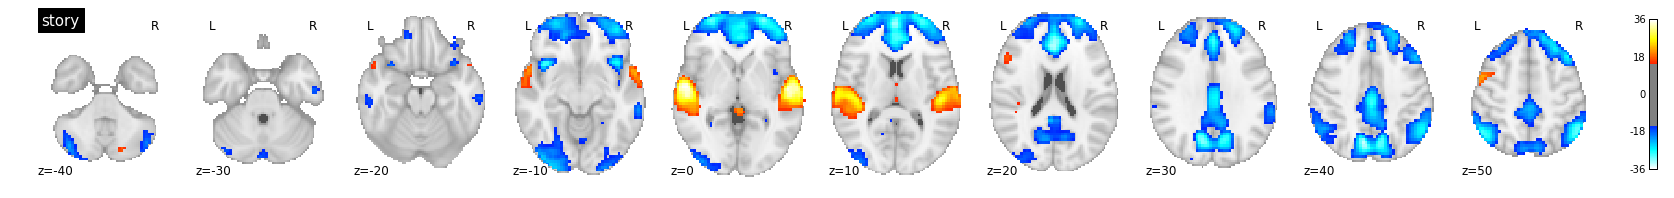

In [5]:
for index, trial in enumerate(trial_names):
    trial_file = os.path.join(path_rmaps, rmaps_file_pattern.format(trial))
    in_vol=nib.load(trial_file)
    
    print("(%s, %s, %s) is the shape of for trial: " %  in_vol.shape, trial)
    print("Min = %.3f; Max = %.3f" % (in_vol.get_data().min(), in_vol.get_data().max()))
    
    
    # Plot volume
    display = plotting.plot_stat_map(in_vol, threshold= 15,
                                     cut_coords=(-50, 14, 12),
                                     title= trial
                                    )
    #print ("SPM map for {} trial".format(trial))
    display = plotting.plot_stat_map(in_vol, threshold= 15,
                                     display_mode='y',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=15,
                                     display_mode='x',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=15,
                                     display_mode='z',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


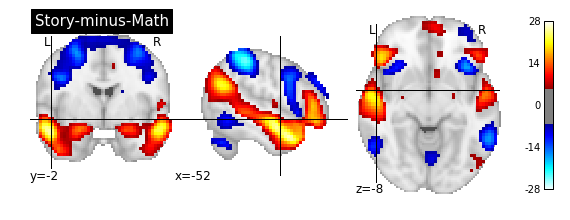

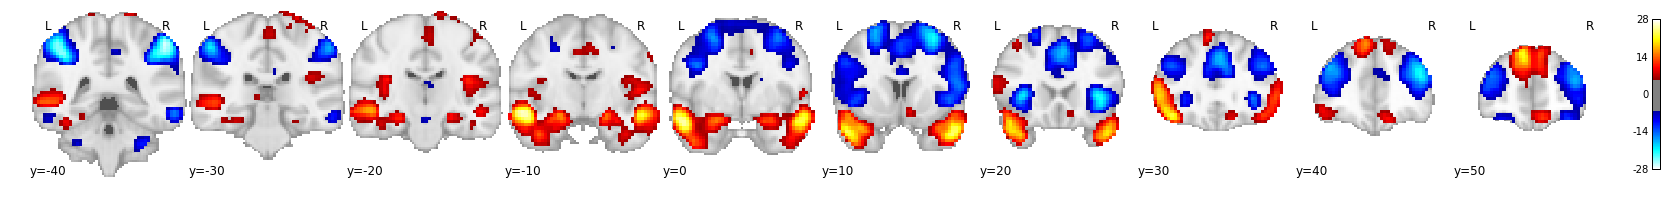

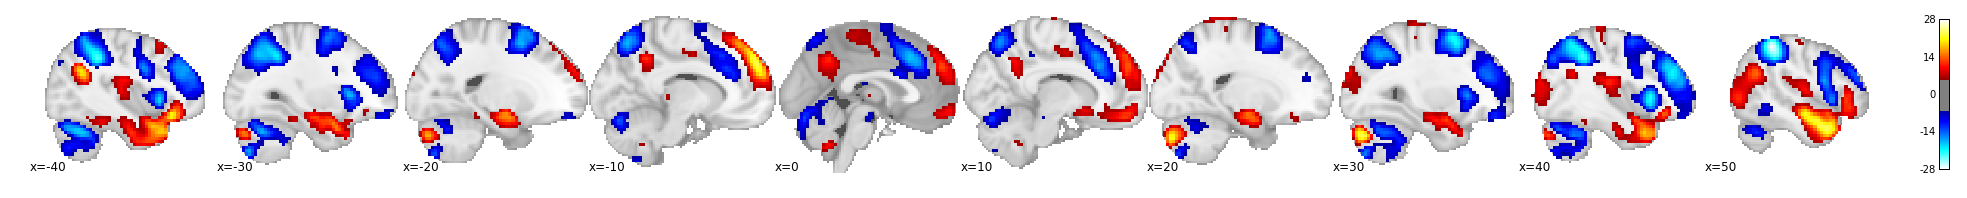

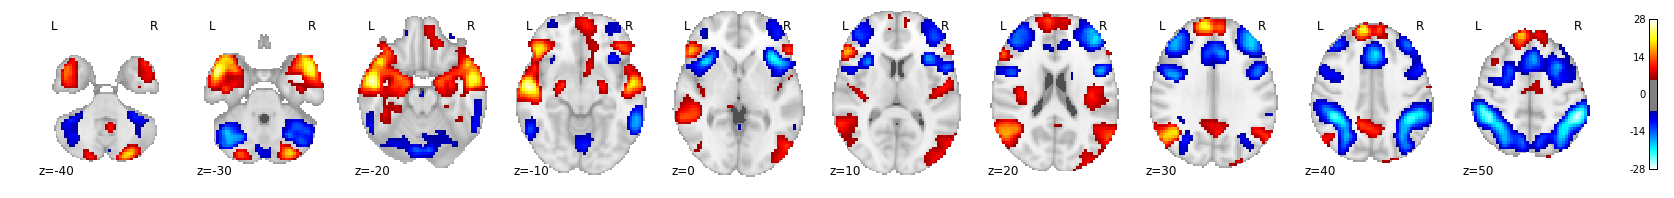

In [6]:
# display map difference Math - Story

in_vol_math = nib.load(os.path.join(path_rmaps, rmaps_file_pattern.format("math")))
in_vol_story = nib.load(os.path.join(path_rmaps, rmaps_file_pattern.format("story")))
in_story_minus_math = in_vol_story.get_data() - in_vol_math.get_data()
in_vol_story_minus_math = nib.Nifti1Image(in_story_minus_math, 
                                          affine=in_vol_story.affine, 
                                          header=in_vol_story.header
                                         )
nib.save(in_vol_story_minus_math, os.path.join(path_rmaps,'story_minus_math.nii.gz'))
display = plotting.plot_stat_map(in_vol_story_minus_math, threshold= 6,
                                 cut_coords=(-52, -2, -8),
                                 title= "Story-minus-Math"
                                 )
display = plotting.plot_stat_map(in_vol_story_minus_math, threshold= 6,
                                 display_mode='y',
                                 cut_coords= range(-40, 60, 10),
                                )
display = plotting.plot_stat_map(in_vol_story_minus_math, threshold=6,
                                 display_mode='x',
                                 cut_coords= range(-40, 60, 10),
                                )
display = plotting.plot_stat_map(in_vol_story_minus_math, threshold=6,
                                 display_mode='z',
                                 cut_coords= range(-40, 60, 10),
                                )

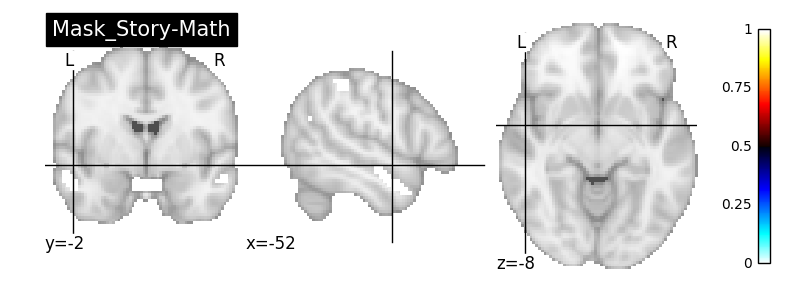

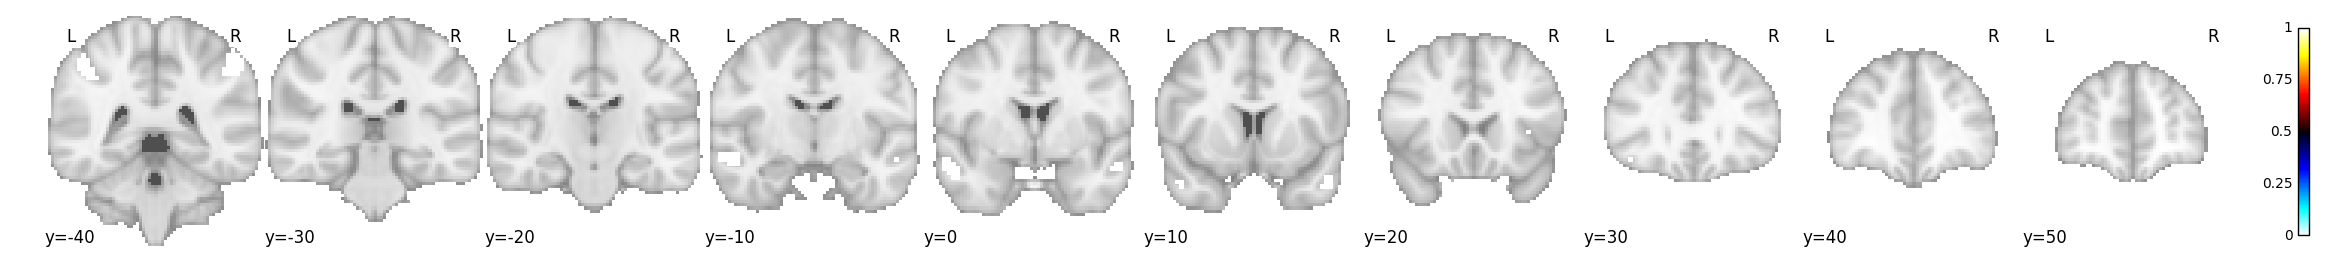

In [23]:
# build mask of story minus math
mask_story_minus_math_high = in_story_minus_math >= 22
mask_story_minus_math_low = in_story_minus_math <= -22
mask_story_minus_math = mask_story_minus_math_low + mask_story_minus_math_high
in_mask_story_minus_math = nib.Nifti1Image(mask_story_minus_math, 
                                          affine=in_vol_story.affine, 
                                          header=in_vol_story.header
                                         )

display = plotting.plot_stat_map(in_mask_story_minus_math,
                                 cut_coords=(-52, -2, -8),
                                 title= "Mask_Story-Math"
                                 )
display = plotting.plot_stat_map(in_mask_story_minus_math,
                                 display_mode='y',
                                 cut_coords= range(-40, 60, 10),
                                )


In [26]:
# Extract coorrespmding region from basc partition
in_vol_basc = nib.load(os.path.join(path_root,"subtypes_scores/26-10-2016/basc_LANGUAGE_rl-lr_niak-fix-scrub_900R/stability_group_nii/sci50_scg50_scf49/brain_partition_consensus_group_sci50_scg50_scf49.nii.gz"))
in_basc_select = in_vol_basc.get_data()*mask_story_minus_math

In [30]:
clust_select = np.unique(in_basc_select)
clust_select

array([  0.,   2.,   5.,  14.,  16.,  32.,  36.,  40.,  44.,  45.,  48.,
        49.], dtype=float32)

In [47]:
in_basc_select_mask = [True if x in clust_select else False for x in in_basc_select.flat]

In [45]:
np.shape(in_basc_select)

(53, 64, 52)

In [48]:
np.shape(in_basc_select_mask)

(176384,)

In [50]:
np.unique(in_basc_select_mask)

array([ True], dtype=bool)

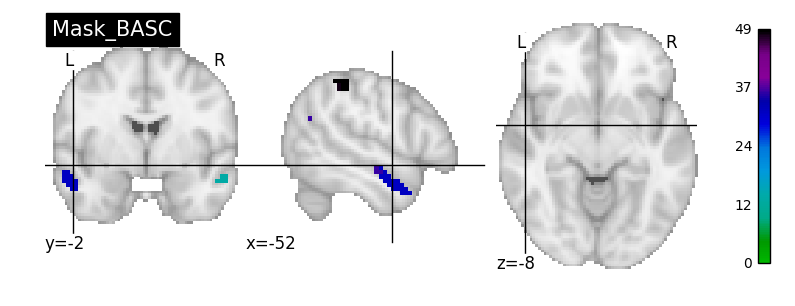

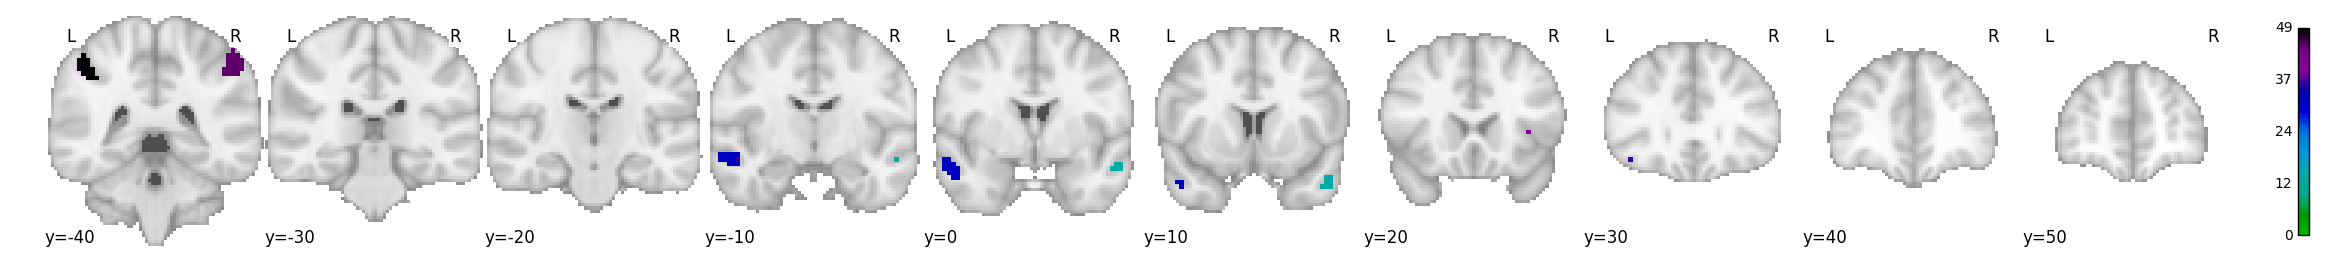

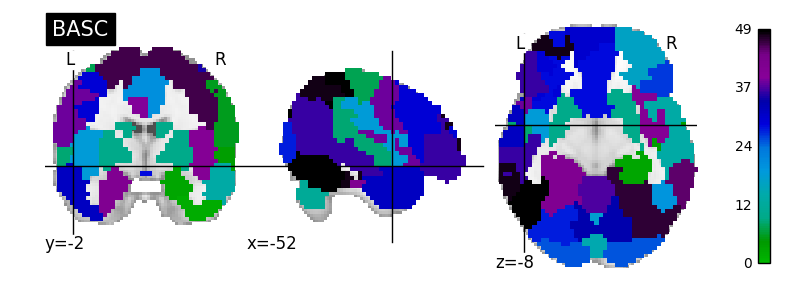

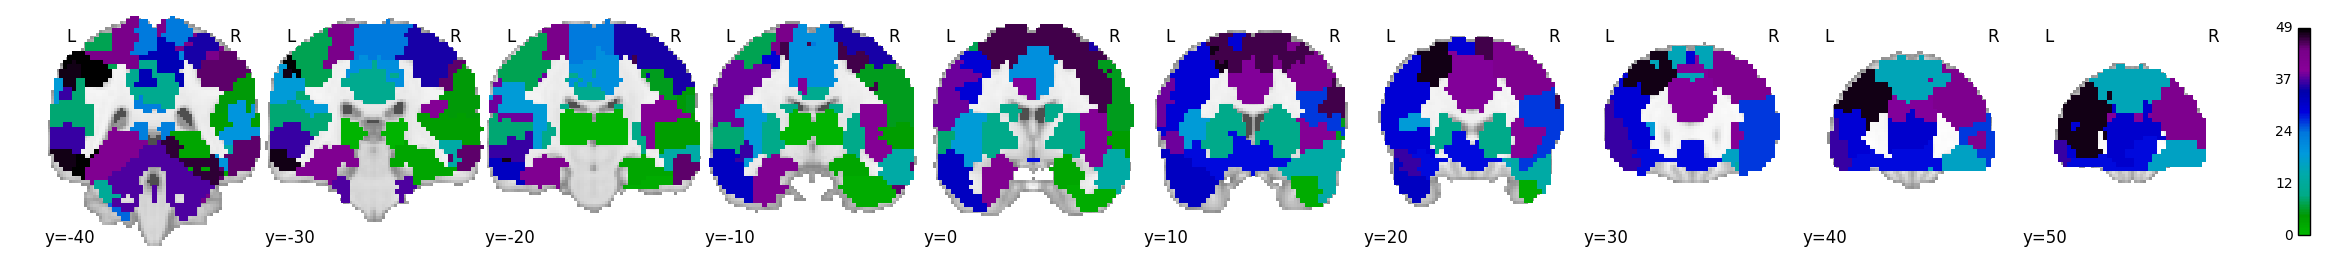

In [28]:
in_vol_basc_select = nib.Nifti1Image(in_basc_select, 
                                          affine=in_vol_basc.affine, 
                                          header=in_vol_basc.header
                                         )

display = plotting.plot_stat_map(in_vol_basc_select,
                                 cut_coords=(-52, -2, -8),
                                 title= "Mask_BASC",
                                 cmap=cmx.nipy_spectral_r
                                 )
display = plotting.plot_stat_map(in_vol_basc_select,
                                 display_mode='y',
                                 cut_coords= range(-40, 60, 10),
                                 cmap=cmx.nipy_spectral_r
                                )
# basc partion
display = plotting.plot_stat_map(in_vol_basc,
                                 cut_coords=(-52, -2, -8),
                                 title= "BASC",
                                 cmap=cmx.nipy_spectral_r
                                 )
display = plotting.plot_stat_map(in_vol_basc,
                                 display_mode='y',
                                 cut_coords= range(-40, 60, 10),
                                 cmap=cmx.nipy_spectral_r
                                )

In [43]:
print("(%s, %s, %s) is the shape of basc masked volume " %  in_vol_basc_select.shape)
print("Min = %.3f; Max = %.3f" % (in_vol_basc_select.get_data().min(), in_vol_basc_select.get_data().max()))

(53, 64, 52) is the shape of basc masked volume 
Min = 0.000; Max = 69.000
